<a href="https://colab.research.google.com/github/Junyoungs7/ssification_of_movement_movements/blob/main/movements_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON/운동 동작 분류/235689_운동 동작 분류 AI 경진대회_data/train_features.csv')
train_labels = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON/운동 동작 분류/235689_운동 동작 분류 AI 경진대회_data/train_labels.csv')
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON/운동 동작 분류/235689_운동 동작 분류 AI 경진대회_data/test_features.csv')
submission = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON/운동 동작 분류/235689_운동 동작 분류 AI 경진대회_data/sample_submission.csv')

In [ ]:
train.head(10)

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
5,0,5,1.289304,-0.214665,-0.249887,10.065865,-64.250636,-29.286448
6,0,6,1.281405,-0.265540,-0.257836,3.916651,-68.661900,-27.142303
7,0,7,1.242273,-0.292931,-0.269638,5.153811,-73.190911,-29.084766
8,0,8,1.198871,-0.273369,-0.292713,8.494859,-74.849794,-31.135732
9,0,9,1.113677,-0.253454,-0.230331,22.405416,-85.755582,-37.407136


In [ ]:
train['id'].value_counts()

0       600
2100    600
2078    600
2079    600
2080    600
       ... 
1044    600
1045    600
1046    600
1047    600
3124    600
Name: id, Length: 3125, dtype: int64

In [ ]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


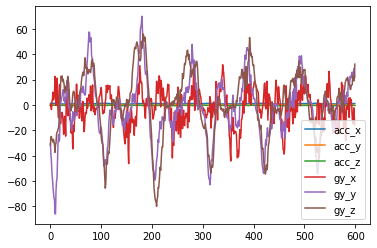

In [ ]:
ex = train[train['id']==0]
ex.iloc[:,2:].plot()

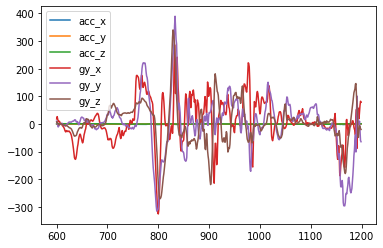

In [ ]:
ex = train[train['id']==1]
ex.iloc[:,2:].plot()

In [ ]:
test['id'].nunique()

782

In [ ]:
print(train.shape, test.shape, submission.shape)

(1875000, 8) (469200, 8) (782, 62)


In [ ]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
X = tf.reshape(np.array(train.iloc[:,2:]), [-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

tf.reshape(tensor, shape) 의 shape 에 '-1' 이 들어있으면, 숫자가 기입된 부분의 축을 변환하고 난 후에, "남은 축의 형태는 원래 텐서의 총 크기와 같도록 알아서 추정"해준다는 뜻입니다. 

In [ ]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [ ]:
y = tf.keras.utils.to_categorical(train_labels['label'])
y.shape

(3125, 61)

to_categorical 함수는 one-hot encoding 해주는 함수

위 train_labels의 label feature만 뽑은 후 to_categorical 함수를 사용하여 y에 담아줌

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# 모델 학습 및 예측

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(600, 6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 16s 576ms/step - loss: 3.7795 - accuracy: 0.3240 - val_loss: 3.3336 - val_accuracy: 0.4976
Epoch 2/30
20/20 [==============================] - 11s 528ms/step - loss: 3.0215 - accuracy: 0.4828 - val_loss: 2.7841 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 10s 524ms/step - loss: 2.7526 - accuracy: 0.4828 - val_loss: 2.7121 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 10s 528ms/step - loss: 2.6949 - accuracy: 0.4828 - val_loss: 2.6718 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 11s 575ms/step - loss: 2.6432 - accuracy: 0.4828 - val_loss: 2.6303 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 10s 525ms/step - loss: 2.5899 - accuracy: 0.4824 - val_loss: 2.5923 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 11s 562ms/step - loss: 2.5382 - accuracy: 0.4844 - val_loss: 2.5525 - val_accuracy: 0.5024

In [ ]:
test_X = tf.reshape(np.array(test.iloc[:,2:]), [-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [ ]:
prediction = model.predict(test_X)

In [ ]:
prediction.shape

(782, 61)

In [ ]:
prediction

array([[2.8409350e-03, 2.4393515e-03, 1.8847977e-05, ..., 3.5361573e-03,
        1.3373137e-03, 2.4649704e-02],
       [9.6718193e-04, 2.6994085e-02, 4.6434470e-05, ..., 9.4626372e-04,
        1.4737760e-02, 3.9034849e-04],
       [1.0180051e-03, 1.3504286e-03, 8.9684499e-06, ..., 1.4703133e-02,
        2.3804610e-03, 4.2990427e-03],
       ...,
       [8.2275004e-04, 2.8297373e-03, 7.1157323e-05, ..., 1.7619353e-03,
        1.4096892e-03, 7.2382361e-04],
       [4.0662959e-03, 1.3306074e-02, 3.7974153e-02, ..., 6.3238787e-03,
        2.9178655e-02, 1.1257439e-04],
       [5.3805085e-03, 1.5120844e-02, 2.8109868e-04, ..., 2.4880308e-03,
        1.6018195e-02, 7.0034788e-04]], dtype=float32)

In [ ]:
submission.iloc[:, 1:] = prediction
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.002841,0.002439,0.000019,0.000225,0.005683,0.001967,0.012725,0.006295,0.002494,...,0.002069,0.007560,0.000007,0.001406,0.000307,0.000907,0.001590,0.003536,0.001337,0.024650
1,3126,0.000967,0.026994,0.000046,0.001090,0.014396,0.001641,0.009119,0.006128,0.000540,...,0.000193,0.000036,0.000042,0.000829,0.000106,0.002027,0.007283,0.000946,0.014738,0.000390
2,3127,0.001018,0.001350,0.000009,0.000027,0.005509,0.001111,0.002279,0.024845,0.000532,...,0.002520,0.002010,0.000005,0.000153,0.000554,0.000402,0.002387,0.014703,0.002380,0.004299
3,3128,0.004590,0.004919,0.000481,0.001351,0.012860,0.001260,0.003322,0.020015,0.018478,...,0.006133,0.001553,0.000043,0.001801,0.001336,0.008872,0.012398,0.007280,0.007434,0.005706
4,3129,0.002336,0.004343,0.000029,0.000245,0.006422,0.001013,0.003508,0.006968,0.000628,...,0.005021,0.001137,0.000017,0.000412,0.000406,0.000426,0.001562,0.006643,0.007560,0.002355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.000709,0.005469,0.000599,0.001570,0.007467,0.068321,0.010846,0.001818,0.000083,...,0.002725,0.000966,0.000348,0.001339,0.007221,0.005698,0.038958,0.003275,0.017685,0.000757
778,3903,0.000518,0.004644,0.000003,0.000040,0.006017,0.001127,0.000751,0.018481,0.000215,...,0.000529,0.001175,0.000006,0.000048,0.000077,0.000518,0.006310,0.008008,0.003368,0.001445
779,3904,0.000823,0.002830,0.000071,0.000152,0.013585,0.001367,0.000844,0.000465,0.000281,...,0.006302,0.000200,0.000004,0.000182,0.000434,0.005997,0.002549,0.001762,0.001410,0.000724
780,3905,0.004066,0.013306,0.037974,0.066448,0.006261,0.005322,0.004499,0.000807,0.001268,...,0.012049,0.000009,0.008726,0.081008,0.030508,0.004628,0.010980,0.006324,0.029179,0.000113


In [ ]:
submission.to_csv('baseline_submission.csv', index=False)